In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/obesitydataa/obesitydata.csv


In [66]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
train_df = pd.read_csv("../input/obesitydataa/obesitydata.csv")
train_df.head(20)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [67]:
train_df.shape

(2111, 17)

In [68]:
train_df['NObeyesdad'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

In [69]:
train_df['CALC'].value_counts()

Sometimes     1401
no             639
Frequently      70
Always           1
Name: CALC, dtype: int64

In [70]:

train_df['MTRANS'].value_counts()

Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64

In [71]:
train_df['BMI'] = train_df['Weight']/(train_df['Height']*train_df['Height'])

In [72]:
train_df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight,20.195092
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight,24.444444
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,19.705532
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight,20.199470
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight,22.985398


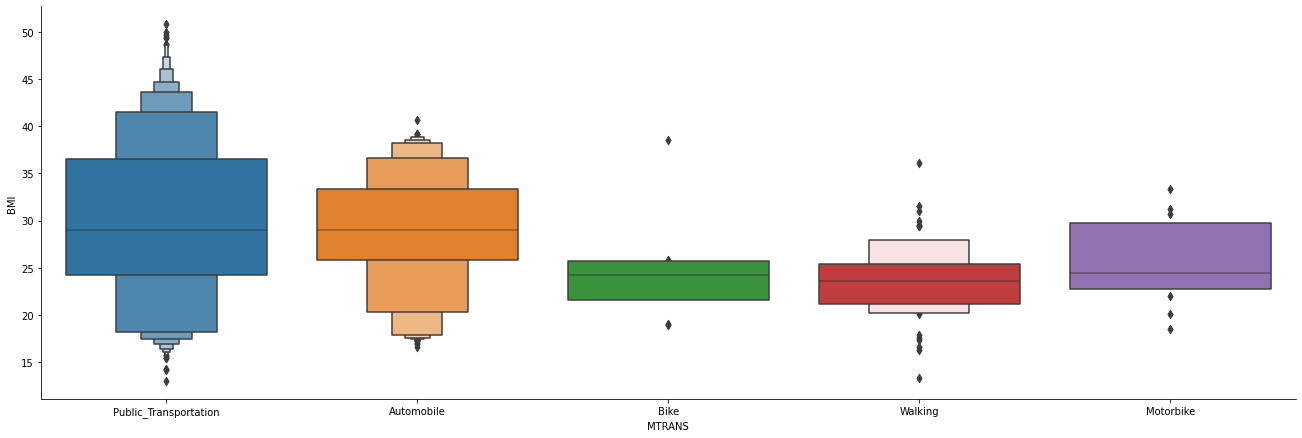

In [73]:
#MODE OF TRANSPORT BIKE AND WALKING DECREASES THE BMI. 
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(y = "BMI", x = "MTRANS", data = train_df.sort_values("BMI", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

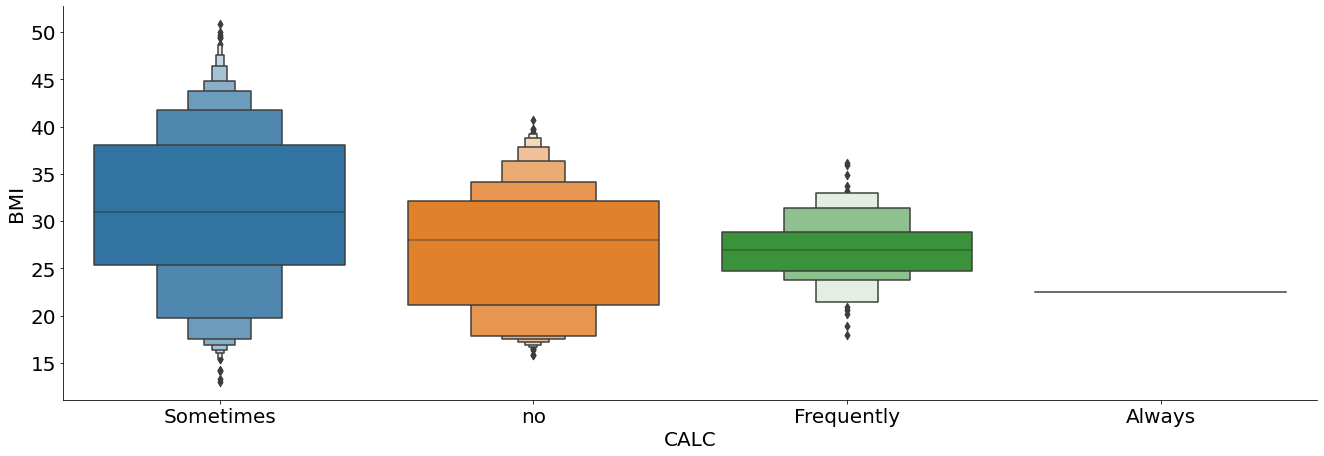

In [74]:
#consumption of alcohol one hot encoding
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(y = "BMI", x = "CALC", data = train_df.sort_values("BMI", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel('BMI', fontsize = 20)
plt.xlabel('CALC',fontsize = 20)
plt.show()

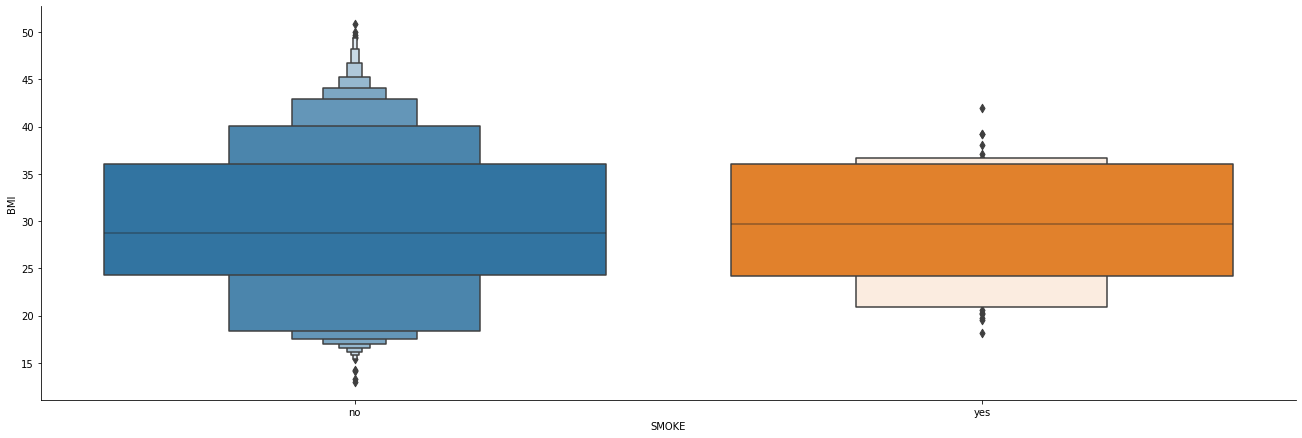

In [75]:
#smoke
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(y = "BMI", x = "SMOKE", data = train_df.sort_values("BMI", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

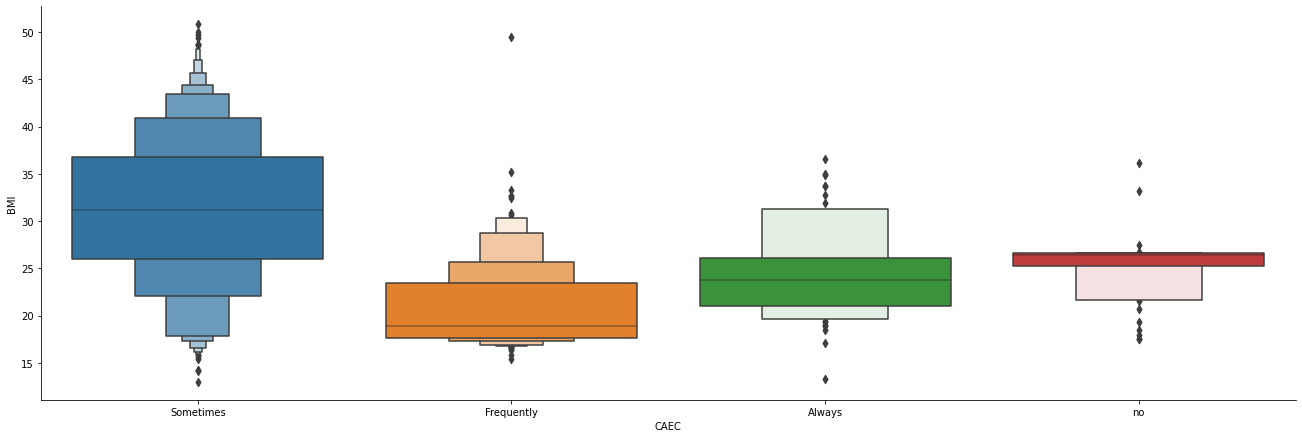

In [76]:
#caec consumption of food between meals label encoder
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(y = "BMI", x = "CAEC", data = train_df.sort_values("BMI", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

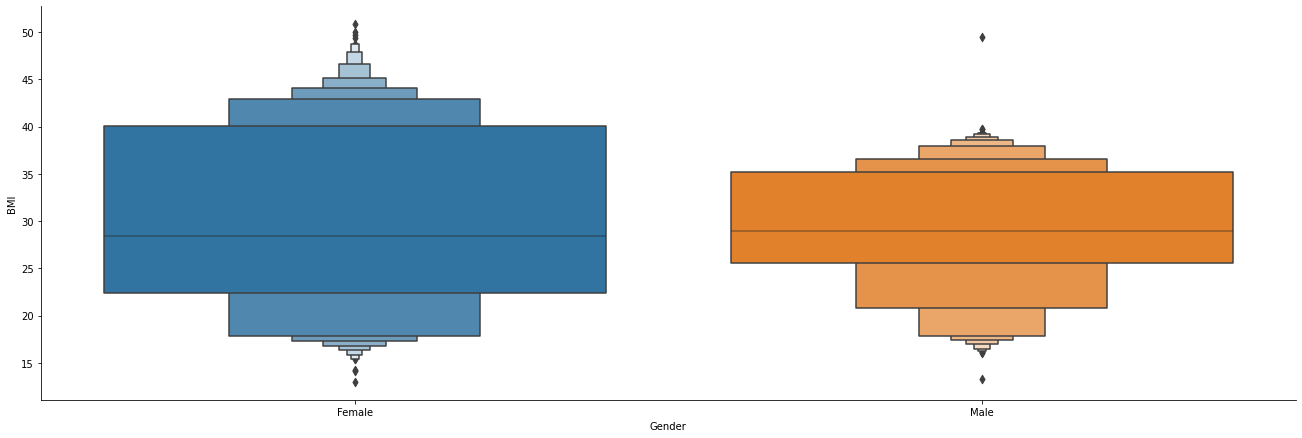

In [77]:

import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(y = "BMI", x = "Gender", data = train_df.sort_values("BMI", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [78]:
Airline = train_df[["CALC"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,CALC_Frequently,CALC_Sometimes,CALC_no
0,0,0,1
1,0,1,0
2,1,0,0
3,1,0,0
4,0,1,0


In [79]:
Airline1 = train_df[["MTRANS"]]

Airline1 = pd.get_dummies(Airline1, drop_first= True)

Airline1.head()

,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,0,1
4,0,0,1,0


In [80]:
train_df.shape

(2111, 18)

In [81]:
train_df2 = pd.concat([train_df,Airline,Airline1], axis = 1)

In [82]:
train_df2.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,MTRANS,NObeyesdad,BMI,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,...,Public_Transportation,Normal_Weight,24.386526,0,0,1,0,0,1,0
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,...,Public_Transportation,Normal_Weight,24.238227,0,1,0,0,0,1,0
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,...,Public_Transportation,Normal_Weight,23.765432,1,0,0,0,0,1,0
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,...,Walking,Overweight_Level_I,26.851852,1,0,0,0,0,0,1
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,...,Public_Transportation,Overweight_Level_II,28.342381,0,1,0,0,0,1,0


In [83]:
train_df2.replace({"Obesity_Type_I": 4, "Obesity_Type_III": 6, "Obesity_Type_II": 5, "Overweight_Level_II": 3,   
"Overweight_Level_I": 2, "Normal_Weight": 1, "Insufficient_Weight": 0}, inplace = True)

In [84]:

train_df2.replace({"no": 0, "yes": 1}, inplace = True)

In [85]:

train_df2.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,MTRANS,NObeyesdad,BMI,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,Female,21.0,1.62,64.0,1,0,2.0,3.0,Sometimes,0,...,Public_Transportation,1,24.386526,0,0,1,0,0,1,0
1,Female,21.0,1.52,56.0,1,0,3.0,3.0,Sometimes,1,...,Public_Transportation,1,24.238227,0,1,0,0,0,1,0
2,Male,23.0,1.80,77.0,1,0,2.0,3.0,Sometimes,0,...,Public_Transportation,1,23.765432,1,0,0,0,0,1,0
3,Male,27.0,1.80,87.0,0,0,3.0,3.0,Sometimes,0,...,Walking,2,26.851852,1,0,0,0,0,0,1
4,Male,22.0,1.78,89.8,0,0,2.0,1.0,Sometimes,0,...,Public_Transportation,3,28.342381,0,1,0,0,0,1,0
5,Male,29.0,1.62,53.0,0,1,2.0,3.0,Sometimes,0,...,Automobile,1,20.195092,0,1,0,0,0,0,0
6,Female,23.0,1.50,55.0,1,1,3.0,3.0,Sometimes,0,...,Motorbike,1,24.444444,0,1,0,0,1,0,0
7,Male,22.0,1.64,53.0,0,0,2.0,3.0,Sometimes,0,...,Public_Transportation,1,19.705532,0,1,0,0,0,1,0
8,Male,24.0,1.78,64.0,1,1,3.0,3.0,Sometimes,0,...,Public_Transportation,1,20.199470,1,0,0,0,0,1,0
9,Male,22.0,1.72,68.0,1,1,2.0,3.0,Sometimes,0,...,Public_Transportation,1,22.985398,0,0,1,0,0,1,0


In [86]:
train_df2.replace({"Sometimes": 2, "Frequently": 0, "Always": 1}, inplace = True)

In [87]:
train_df2.replace({"Bike": 0, "Walking": 0, "Public_Transportation": 1, "Automobile": 1, "Motorbike": 1}, inplace = True)

In [88]:
train_df2.replace({"Female": 0, "Male": 1}, inplace = True)

In [89]:
train_df2.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,MTRANS,NObeyesdad,BMI,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,...,1,1,24.386526,0,0,1,0,0,1,0
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,...,1,1,24.238227,0,1,0,0,0,1,0
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,...,1,1,23.765432,1,0,0,0,0,1,0
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,...,0,2,26.851852,1,0,0,0,0,0,1
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,...,1,3,28.342381,0,1,0,0,0,1,0


In [90]:

train_df2.shape

(2111, 25)

# # Classification _ Obesity Prediction

In [91]:
from scipy import stats
train_df3 = train_df2[(np.abs(stats.zscore(train_df2)) < 3).all(axis=1)]

In [92]:
train_df3.shape

(1840, 25)

In [93]:
train_df3.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,MTRANS,NObeyesdad,BMI,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,...,1,1,24.386526,0,0,1,0,0,1,0
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,...,1,3,28.342381,0,1,0,0,0,1,0
5,1,29.0,1.62,53.0,0,1,2.0,3.0,2,0,...,1,1,20.195092,0,1,0,0,0,0,0
7,1,22.0,1.64,53.0,0,0,2.0,3.0,2,0,...,1,1,19.705532,0,1,0,0,0,1,0
9,1,22.0,1.72,68.0,1,1,2.0,3.0,2,0,...,1,1,22.985398,0,0,1,0,0,1,0
10,1,26.0,1.85,105.0,1,1,3.0,3.0,0,0,...,1,4,30.679328,0,1,0,0,0,1,0
12,1,22.0,1.65,56.0,0,0,3.0,3.0,2,0,...,1,1,20.569330,0,1,0,0,0,1,0
14,1,23.0,1.77,60.0,1,1,3.0,1.0,2,0,...,1,1,19.151585,0,1,0,0,0,1,0
16,1,27.0,1.93,102.0,1,1,2.0,1.0,2,0,...,1,3,27.383285,0,1,0,0,0,1,0
17,0,29.0,1.53,78.0,0,1,2.0,1.0,2,0,...,1,4,33.320518,0,0,1,0,0,0,0


In [94]:
np.random.seed(42)

In [95]:
df = train_df2.copy()
X=df.drop(['Height','Weight','BMI','CALC','NObeyesdad'],axis=1)
y=df['NObeyesdad']

In [96]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [97]:
df.to_csv("RedLights.csv")

In [98]:
X_train.shape


(1688, 20)

In [99]:
X_train

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,MTRANS,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
162,0,21.000000,1,1,3.000000,3.000000,1,1,2.000000,0,2.000000,0.000000,1,0,1,0,0,0,1,0
2001,0,20.924956,1,1,3.000000,3.000000,2,0,2.887659,0,1.480919,0.779641,1,0,1,0,0,0,1,0
1435,0,22.899740,1,1,1.203754,1.355354,2,0,2.765593,0,0.128342,1.659476,1,0,1,0,0,0,1,0
649,0,21.837996,0,0,3.000000,1.696080,0,0,2.550307,0,1.098862,0.000000,1,0,0,1,0,0,1,0
1280,1,25.994746,1,1,3.000000,3.000000,2,0,2.858171,0,1.813318,0.680215,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,1,32.290160,1,1,2.967300,3.000000,2,0,2.530035,0,0.955317,1.339232,1,0,1,0,0,0,0,0
1095,1,23.000000,1,1,2.000000,1.729553,2,0,1.400247,0,0.887923,1.011983,1,0,1,0,0,0,1,0
1130,0,22.989846,1,1,2.000000,3.000000,2,0,2.000000,0,0.146919,2.000000,1,0,0,1,0,0,1,0
1294,0,23.000000,1,1,2.058687,2.962004,2,0,2.010596,0,0.851059,0.630866,1,0,0,1,0,0,1,0


In [100]:
X_test.shape

(423, 20)

In [101]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(random_state = 42).fit(X_train,y_train)
prediction=rf_classifier.predict(X_test)


In [102]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))


[[52  2  2  0  0  0  0]
 [ 6 45  6  1  3  1  0]
 [ 0 11 41  1  2  1  0]
 [ 1  3  3 36  3  4  0]
 [ 0  6  0  2 67  3  0]
 [ 0  3  0  0  0 55  0]
 [ 0  0  0  0  0  0 63]]
0.8486997635933806
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        56
           1       0.64      0.73      0.68        62
           2       0.79      0.73      0.76        56
           3       0.90      0.72      0.80        50
           4       0.89      0.86      0.88        78
           5       0.86      0.95      0.90        58
           6       1.00      1.00      1.00        63

    accuracy                           0.85       423
   macro avg       0.85      0.84      0.85       423
weighted avg       0.85      0.85      0.85       423



In [103]:
import pickle

In [104]:
# Save the Modle to file in the current working directory
Pkl_Filename = "Obesity_level_RandomForest.pkl"  
with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(rf_classifier, file)

In [105]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    Pickled_RF_Model = pickle.load(file)

Pickled_RF_Model

RandomForestClassifier(random_state=42)

In [106]:
prediction=Pickled_RF_Model.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[52  2  2  0  0  0  0]
 [ 6 45  6  1  3  1  0]
 [ 0 11 41  1  2  1  0]
 [ 1  3  3 36  3  4  0]
 [ 0  6  0  2 67  3  0]
 [ 0  3  0  0  0 55  0]
 [ 0  0  0  0  0  0 63]]
0.8486997635933806
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        56
           1       0.64      0.73      0.68        62
           2       0.79      0.73      0.76        56
           3       0.90      0.72      0.80        50
           4       0.89      0.86      0.88        78
           5       0.86      0.95      0.90        58
           6       1.00      1.00      1.00        63

    accuracy                           0.85       423
   macro avg       0.85      0.84      0.85       423
weighted avg       0.85      0.85      0.85       423



# Regression _ Bodyweight prediction

In [107]:
def mape(actual: np.ndarray, predicted: np.ndarray):
    """
    Mean Absolute Percentage Error
    Properties:
        + Easy to interpret
        + Scale independent
        - Biased, not symmetric
        - Undefined when actual[t] == 0
    Note: result is NOT multiplied by 100
    """
    return np.mean(np.abs(_percentage_error(actual, predicted)))
def smape(actual: np.ndarray, predicted: np.ndarray):
    """
    Symmetric Mean Absolute Percentage Error
    Note: result is NOT multiplied by 100
    """
    return np.mean(2.0 * np.abs(actual - predicted) / ((np.abs(actual) + np.abs(predicted)) + EPSILON))
EPSILON = 1e-10
def _error(actual: np.ndarray, predicted: np.ndarray):
    return actual - predicted
def _percentage_error(actual: np.ndarray, predicted: np.ndarray):
    return _error(actual, predicted) / (actual + EPSILON)

In [108]:
df = train_df2.copy()
X=df.drop(['Weight','BMI','CALC'],axis=1)
y=df['Weight']


In [109]:
X

,Gender,Age,Height,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,...,TUE,MTRANS,NObeyesdad,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,21.000000,1.620000,1,0,2.0,3.0,2,0,2.000000,...,1.000000,1,1,0,0,1,0,0,1,0
1,0,21.000000,1.520000,1,0,3.0,3.0,2,1,3.000000,...,0.000000,1,1,0,1,0,0,0,1,0
2,1,23.000000,1.800000,1,0,2.0,3.0,2,0,2.000000,...,1.000000,1,1,1,0,0,0,0,1,0
3,1,27.000000,1.800000,0,0,3.0,3.0,2,0,2.000000,...,0.000000,0,2,1,0,0,0,0,0,1
4,1,22.000000,1.780000,0,0,2.0,1.0,2,0,2.000000,...,0.000000,1,3,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,1,1,3.0,3.0,2,0,1.728139,...,0.906247,1,6,0,1,0,0,0,1,0
2107,0,21.982942,1.748584,1,1,3.0,3.0,2,0,2.005130,...,0.599270,1,6,0,1,0,0,0,1,0
2108,0,22.524036,1.752206,1,1,3.0,3.0,2,0,2.054193,...,0.646288,1,6,0,1,0,0,0,1,0
2109,0,24.361936,1.739450,1,1,3.0,3.0,2,0,2.852339,...,0.586035,1,6,0,1,0,0,0,1,0


In [110]:
y

0        64.000000
1        56.000000
2        77.000000
3        87.000000
4        89.800000
           ...    
2106    131.408528
2107    133.742943
2108    133.689352
2109    133.346641
2110    133.472641
Name: Weight, Length: 2111, dtype: float64

In [111]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
from sklearn.ensemble import RandomForestRegressor
rf_regressor=RandomForestRegressor(random_state = 42).fit(X_train,y_train)
prediction=rf_regressor.predict(X_test)


In [112]:
from math import sqrt
from sklearn.metrics import mean_squared_error
print(sqrt(mean_squared_error(y_test,prediction)))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,prediction))
print(mape(y_test,prediction))

2.851003758471022
1.6546018850118225
0.02215533758739351


In [116]:
# Save the Modle to file in the current working directory
Pkl_Filename = "Bodyweight_RandomForest.pkl"  
with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(rf_regressor, file)

In [117]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    Pickled_RF_Model = pickle.load(file)

Pickled_RF_Model

RandomForestRegressor(random_state=42)

In [118]:
prediction=Pickled_RF_Model.predict(X_test)


In [119]:
from math import sqrt
from sklearn.metrics import mean_squared_error
print(sqrt(mean_squared_error(y_test,prediction)))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,prediction))
print(mape(y_test,prediction))

2.851003758471022
1.6546018850118225
0.02215533758739351
